In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [80]:
X , y = make_blobs(n_samples = 400 , n_features = 2 , centers = 4 , random_state =40)
print(X.shape , y.shape)

(400, 2) (400,)


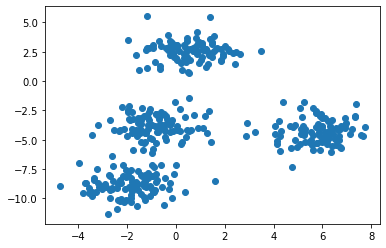

In [81]:
plt.scatter(X[:,0] , X[:,1])
plt.show()

In [65]:
# want to give differnt colors to differnt clusters
colors = ['#fcba03', "#03fcc2", "crimson", "#b30404"]

In [141]:
# making a Kmeans class
class Kmeans :
    
    
    def __init__(self , k , colors) :
        self.k = k
        # we are making dictionary of dictories
        self.clusters = {i : {} for i in range(self.k)}
        for i in range(self.k) :
            self.clusters[i]['color'] = colors[i]
            self.clusters[i]['points'] = []
            
    def plotClusters(self , X , it) :
        
        # draw centers and points 
        for i in range(self.k) :
            indices = self.clusters[i]['points']
            color = self.clusters[i]['color']
            plt.scatter(X[indices , 0] , X[indices , 1] , c = color)
            
            center = self.clusters[i]['center']
            plt.scatter(center[0] , center[1] , marker = "*" , c = 'black')
        plt.title(f"Iteration : {it+1}")
        plt.show()
        
    
    def updateCenters(self , X) :
        for i in range(self.k) :
            idx = self.clusters[i]['points']
            self.clusters[i]['center'] = X[idx].mean(axis = 0)
            self.clusters[i]['points'] = []
    
    
    def fit(self , X , itr = 3) :
        
        # Finding minimum and maximum
        min_ = X.min(axis = 0)
        max_ = X.max(axis = 0)
        
        # picking random centers - we are taking k random centers here 
        for ix in range(self.k) :
            center = np.empty((X.shape[1] ,))
            # for number of features
            for j in range(X.shape[1]) :
                center[j] = np.random.uniform(min_[j] , max_[j])
            self.clusters[ix]['center'] = center
        
        for it in range(itr) :
        
            # assign points to each center
            # here we are taking ak point then computing its distance from all centers - jisse distance minimum , vo point us center ka
            for i in range(X.shape[0]) :
                dist = []
                for ix in range(self.k) :
                    d = np.linalg.norm(X[i] - self.clusters[ix]['center'] , ord = 2 , axis = 0)
                    dist.append(d)
                label = np.argmin(dist)
                self.clusters[label]['points'].append(i)

            # plot clusters 
            self.plotClusters(X,it)

            # update centers of each cluster
            if it != itr - 1 :
                self.updateCenters(X)
                
                
    # in this we will tell which point belong to which class            
    def predict(self, X):
        pred = np.empty((len(X),), dtype='int')
        for i in range(self.k):
            idx = self.clusters[i]['points']
            pred[idx] = i
        return pred
         

In [27]:
# instance in which we wanted to see how centers are assigned
km = Kmeans(3)
print(km.clusters)
# I have not fitted the model so here we can see this is my initial cluster

{0: {}, 1: {}, 2: {}}


In [28]:
km.fit(X)
print(km.clusters)
# now my cluster have centers also 

{0: {'center': array([-4.26586316,  1.72683575])}, 1: {'center': array([-9.69538775,  0.12389873])}, 2: {'center': array([-8.39507829,  1.81829258])}}
{0: {'center': array([-4.26586316,  1.72683575])}, 1: {'center': array([-9.69538775,  0.12389873])}, 2: {'center': array([-8.39507829,  1.81829258])}}


In [31]:
# instance in which we want to see how to give colors
km1 = Kmeans(4,colors)
print(km1.clusters)
# we can see already colors are filled

{0: {'color': '#fcba03', 'points': []}, 1: {'color': '#03fcc2', 'points': []}, 2: {'color': 'crimson', 'points': []}, 3: {'color': '#b30404', 'points': []}}


In [32]:
# now fit and get centers
km1.fit(X)
print(km1.clusters)
# we can see points are still empty

{0: {'color': '#fcba03', 'points': [], 'center': array([5.64494063, 4.03407252])}, 1: {'color': '#03fcc2', 'points': [], 'center': array([-6.36324863,  6.63458444])}, 2: {'color': 'crimson', 'points': [], 'center': array([7.33199312, 7.67501523])}, 3: {'color': '#b30404', 'points': [], 'center': array([6.24051422, 8.73346741])}}
{0: {'color': '#fcba03', 'points': [], 'center': array([5.64494063, 4.03407252])}, 1: {'color': '#03fcc2', 'points': [], 'center': array([-6.36324863,  6.63458444])}, 2: {'color': 'crimson', 'points': [], 'center': array([7.33199312, 7.67501523])}, 3: {'color': '#b30404', 'points': [], 'center': array([6.24051422, 8.73346741])}}


In [83]:
# now to check ki points append hua ki nahi 
km2 = Kmeans(4,colors)
print(km2.clusters)

{0: {'color': '#fcba03', 'points': []}, 1: {'color': '#03fcc2', 'points': []}, 2: {'color': 'crimson', 'points': []}, 3: {'color': '#b30404', 'points': []}}


In [84]:
km2.fit(X)
print(km2.clusters)

{0: {'color': '#fcba03', 'points': [5, 8, 10, 14, 15, 18, 22, 23, 33, 34, 36, 39, 46, 50, 51, 54, 60, 61, 80, 90, 91, 93, 95, 96, 97, 100, 108, 110, 111, 125, 129, 130, 131, 133, 141, 146, 147, 148, 149, 151, 155, 163, 166, 174, 182, 186, 188, 189, 195, 198, 202, 203, 207, 209, 211, 216, 222, 223, 224, 231, 240, 244, 246, 252, 255, 259, 262, 266, 270, 271, 273, 274, 275, 278, 283, 293, 298, 303, 305, 310, 311, 313, 321, 323, 325, 328, 331, 335, 337, 341, 347, 350, 353, 357, 362, 363, 372, 373, 381, 384, 385, 386, 387, 396], 'center': array([ 2.16132315, -6.64913816])}, 1: {'color': '#03fcc2', 'points': [1, 2, 3, 6, 16, 26, 27, 28, 30, 32, 35, 38, 45, 47, 48, 53, 55, 63, 67, 69, 79, 83, 87, 88, 104, 114, 115, 117, 118, 119, 121, 128, 132, 137, 138, 140, 143, 153, 154, 158, 159, 162, 164, 165, 171, 175, 177, 184, 185, 194, 200, 201, 204, 212, 226, 228, 236, 237, 250, 260, 264, 265, 272, 281, 284, 287, 292, 295, 296, 304, 307, 308, 315, 318, 319, 329, 330, 342, 345, 358, 359, 365, 366, 36

In [110]:
# Now we want to plot our points and centers 
# make a function in class Kmeans

In [142]:
# Now we completed with our class
kmMain = Kmeans(4,colors)
print(kmMain.clusters)

{0: {'color': '#fcba03', 'points': []}, 1: {'color': '#03fcc2', 'points': []}, 2: {'color': 'crimson', 'points': []}, 3: {'color': '#b30404', 'points': []}}


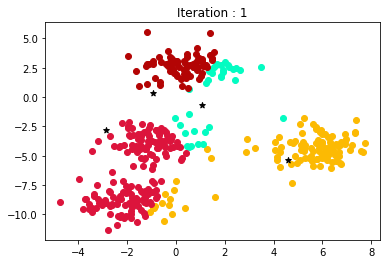

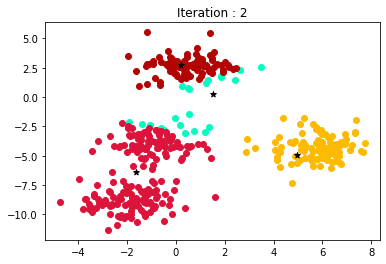

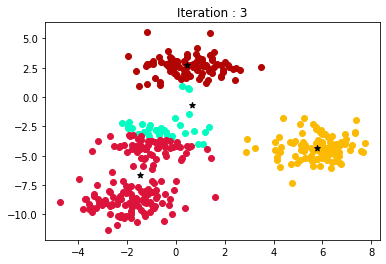

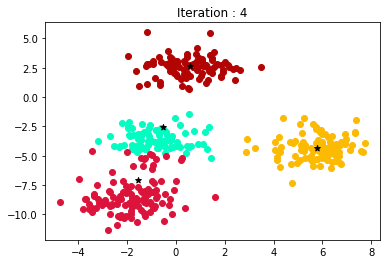

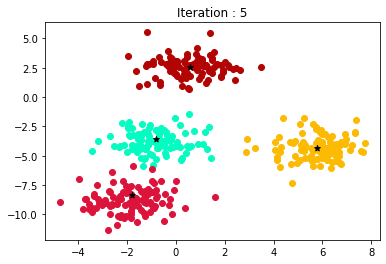

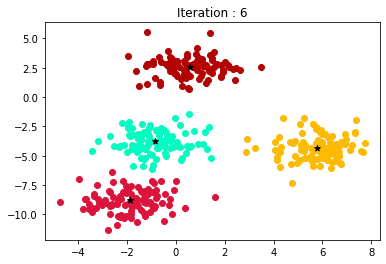

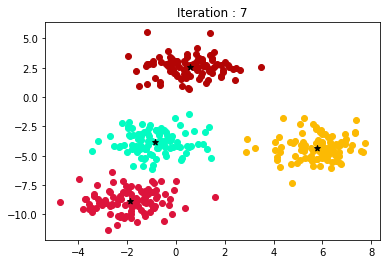

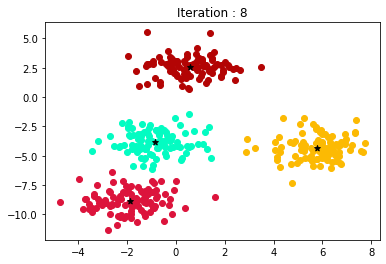

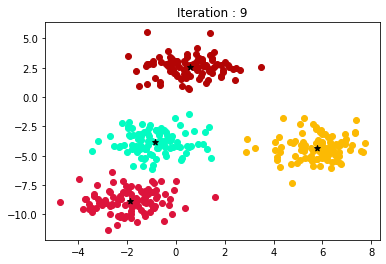

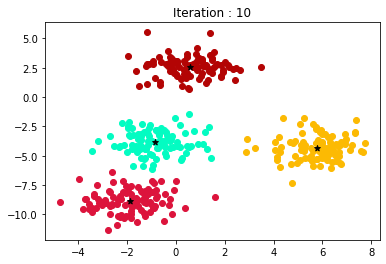

In [143]:
kmMain.fit(X,10)

In [128]:
# we have noticed that dheere dheere karke random center properly beech me aagae

In [147]:
# Now we will print ypred
# it contains predicted classes
ypred = kmMain.predict(X)
ypred

array([3, 0, 0, 0, 1, 2, 0, 3, 2, 1, 2, 3, 3, 1, 2, 2, 0, 3, 2, 3, 3, 1,
       2, 2, 1, 3, 0, 0, 0, 3, 0, 3, 0, 0, 2, 0, 2, 1, 0, 2, 1, 3, 3, 1,
       1, 0, 2, 0, 0, 3, 2, 2, 3, 0, 0, 0, 3, 3, 1, 3, 2, 2, 1, 0, 3, 1,
       3, 0, 1, 0, 3, 1, 3, 3, 1, 1, 3, 1, 3, 0, 2, 3, 1, 0, 1, 3, 1, 0,
       0, 1, 2, 2, 1, 2, 3, 2, 2, 2, 1, 3, 2, 1, 1, 3, 0, 1, 3, 1, 2, 3,
       2, 0, 3, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 1, 2, 3, 1, 0, 2, 2, 2,
       0, 2, 3, 1, 1, 0, 0, 3, 0, 2, 3, 0, 3, 3, 2, 2, 2, 2, 1, 2, 3, 0,
       0, 2, 1, 3, 0, 0, 1, 1, 0, 2, 0, 0, 2, 3, 1, 3, 3, 0, 1, 1, 2, 0,
       3, 0, 1, 3, 1, 1, 2, 1, 0, 0, 2, 3, 2, 2, 1, 3, 1, 1, 0, 2, 3, 3,
       2, 1, 0, 0, 2, 2, 0, 1, 3, 2, 1, 2, 3, 2, 0, 1, 1, 3, 2, 3, 3, 1,
       3, 1, 2, 2, 2, 3, 0, 1, 0, 3, 1, 2, 3, 1, 3, 3, 0, 0, 1, 2, 2, 1,
       1, 3, 2, 1, 2, 3, 3, 3, 0, 1, 2, 3, 3, 2, 1, 1, 3, 2, 0, 3, 2, 1,
       0, 0, 2, 1, 3, 3, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 3, 0, 3, 2, 0, 1,
       1, 0, 1, 3, 3, 1, 0, 2, 1, 0, 0, 1, 2, 3, 3,

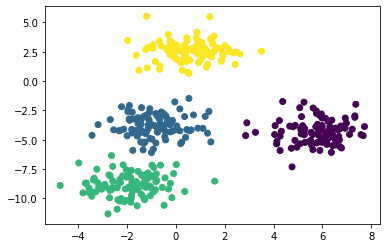

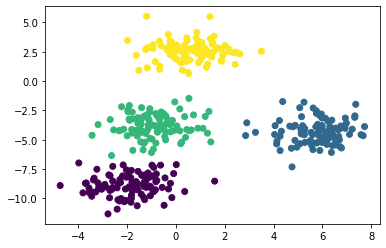

In [148]:
# Now we will plot graph
plt.scatter(X[:,0] , X[:,1] , c = ypred)
plt.show()

plt.scatter(X[:,0] , X[:,1] , c = y)
plt.show()

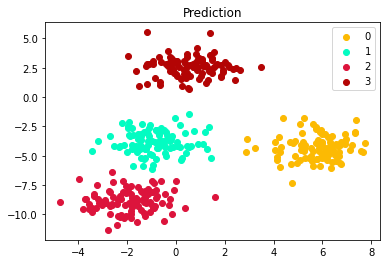

In [151]:
# Plot with colors (Predicted)
for i in range(0,4) :
    idx = (ypred == i)
    plt.scatter(X[idx , 0], X[idx,1] , c = colors[i] , label = i)
plt.legend()
plt.title("Prediction")
plt.show()

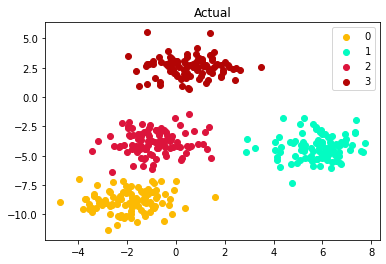

In [152]:
# Plot with colors (Actual)
for i in range(0,4) :
    idx = (y == i)
    plt.scatter(X[idx , 0], X[idx,1] , c = colors[i] , label = i)
plt.legend()
plt.title("Actual")
plt.show()

# Sklearn

In [153]:
from sklearn.cluster import KMeans

In [157]:
kmeans = KMeans(init = 'k-means++', n_clusters = 4)

In [158]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [159]:
ypred = kmeans.predict(X)

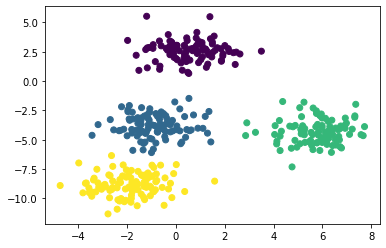

In [160]:
plt.scatter(X[:,0] , X[:,1] , c = ypred)
plt.show()